# Espinardo FLUO 4b

#### FLUO-4b measurements @ Espinardo campus

- Samble 4b: Molecule with 10^12 molecules / cm3 concentration 

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [ ]:
from functools import reduce

In [3]:
from IPython.display import Image as IM
from IPython.display import Math
from IPython.display import Latex

In [4]:
from PIL import Image, ImageFilter

In [5]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Tue Apr 30 08:42:12 2019


In [6]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tables            as tb
import random
import glob
import warnings
sns.set()

In [7]:
from sabat.sbt_espinardo import get_jpeg_dirs
from sabat.sbt_espinardo import get_files
from sabat.sbt_espinardo import read_xls_files
from sabat.sbt_espinardo import sort_by_list
from sabat.sbt_espinardo import sort_files
from sabat.sbt_espinardo import load_LIVE_images
from sabat.sbt_espinardo import expo_seed
from sabat.sbt_espinardo import  get_live_dirs

In [8]:
import invisible_cities.core .fit_functions  as     fitf

In [9]:
from  invisible_cities.core.system_of_units import *

In [10]:
from sabat.sbt_espinardo import get_profile
from sabat.sbt_espinardo import display_profile
from sabat.sbt_espinardo import display_profiles_before_after

In [11]:
from sabat.sbt_espinardo import plot_LIVE_images
from sabat.sbt_espinardo import plot_LIVE_avg
from sabat.sbt_espinardo import plot_avg_intensity
from sabat.sbt_espinardo import plot_total_intensity
from sabat.sbt_espinardo import avg_intensity
from sabat.sbt_espinardo import total_intensity
from sabat.sbt_espinardo import plot_TOM

In [12]:
from sabat.sbt_types import FoV, CircularFoV, Monolayer
from sabat.sbt_types import Laser, PulsedLaser, GLaser, GaussianBeam
from sabat.sbt_types import Molecule
from sabat.sbt_types import Molecule2P
from sabat.sbt_types import DyeSample
from sabat.sbt_types import Microscope
from sabat.sbt_types import CCD

In [122]:
from sabat.sbt_core import  power_density
from sabat.sbt_core import  photon_density
from sabat.sbt_core import  fluorescence_per_molecule
from sabat.sbt_core import  duration_of_fluorescence
from sabat.sbt_core import  diffraction_limit
from sabat.sbt_core import  photoelectrons_per_pixel
from sabat.sbt_core import  fluorescence_2p_gb
from sabat.sbt_core import  fluorescence_2p_dl
from sabat.sbt_core import  absorbed_photons_per_fluorophore_per_pulse_2p

from sabat.sbt_espinardo import get_TOM_files
from sabat.sbt_espinardo import display_profiles
from sabat.sbt_espinardo import show_toms
from sabat.sbt_espinardo import mean_and_std_toms
from sabat.sbt_espinardo import tom_I

In [14]:
from sabat.sbt_types import  photon, molecule, GM, us, ucm2, ucm3, gp 

In [169]:
from dataclasses import dataclass

In [170]:
from sabat.sbt_core  import  FIB 
from sabat.sbt_core  import  FLUO3

In [171]:
from sabat.sbt_core import  Setup

### Data Path

In [16]:
path = '/Users/jjgomezcadenas/Projects/Development/data/2Photon/'

## Sample 4ba

### TOMography scans

- The TOMO at low power are quite unclear.
- Tomo at 300 mW do not affect much the sample. 

In [17]:
ipath = os.path.join(path, 'sample_4b')
print(ipath)

/Users/jjgomezcadenas/Projects/Development/data/2Photon/sample_4b


In [18]:
from typing      import List
def get_files(ipath :str, ftype : str = 'TOM')->List:
    """Organizes the TOM files or LIVE directories in a dictionary"""

    if ftype == 'TOM':  # get TOM files (.xls extension)
        FLS = glob.glob(ipath+"/*.xls", recursive=True)
        print(FLS)
        isplit = -1
    else:
        FLS = get_jpeg_dirs(ipath)  # Get LIVE dirs
        isplit = -2
    KEYS = []
    for t in FLS:
        names = t.split('/')[isplit]
        keys  = names.split('_')
        if ftype == 'TOM':
            KEYS.append(keys[0] + '_' + keys[2] + '_' + keys[3] + '_' + keys[-1].split('.')[0])
        else:
            KEYS.append(keys[0] + '_' + keys[-1])
    DIR = {}
    for i, k in enumerate(KEYS):
        DIR[k] = FLS[i]
    return DIR


In [155]:
TOM = get_TOM_files(ipath)
list(TOM.keys())

['TOMO01_800nm_50mW_S1_256pxTPEF',
 'TOMO02_40Hz_800nm_750mW_S1before',
 'TOMO04_80Hz_800nm_750mW_S1TPEF',
 'TOMO01_800nm_250mW_S1_256pxTPEF',
 'TOMO03_20Hz_800nm_750mW_S1after',
 'TOMO01_800nm_200mW_S1_256pxTPEF',
 'TOMO03_20Hz_800nm_750mW_S1before',
 'TOMO03_80Hz_800nm_750mW_S1TPEF',
 'TOMO02_40Hz_800nm_750mW_S1after',
 'TOMO00_800nm_  100mW_S1_256px01',
 'TOMO01_800nm_ 150mW_S1_256pxTPEF',
 'TOMO01_800nm_ 300mW_S1_256px02',
 'TOMO01_800nm_ 300mW_S1_256px01',
 'TOMO01_800nm_150mW_S1_256pxTPEF',
 'TOMO01_800nm_ 300mW_S1_256px00',
 'TOMO04_20Hz_800nm_750mW_S1TPEF',
 'TOMO01_800nm_ 200mW_S1_256pxTPEF',
 'TOMO03_20Hz_800nm_750mW_S1TPEF',
 'TOMO01_800nm_300mW_S1_256px02',
 'TOMO00_800nm_ 100mW_S1_256px00',
 'TOMO01_800nm_300mW_S1_256px01',
 'TOMO01_800nm_300mW_S1_256px00',
 'TOMO01_800nm_ 250mW_S1_256pxTPEF',
 'TOMO03_40Hz_800nm_750mW_S1TPEF',
 'TOMO01_800nm_100mW_S1_256pxTPEF']

In [166]:
tom300mW11    = read_xls_files(TOM['TOMO01_800nm_ 300mW_S1_256px01'])
tom300mW12    = read_xls_files(TOM['TOMO01_800nm_ 300mW_S1_256px02'])
tom300mW10    = read_xls_files(TOM['TOMO01_800nm_ 300mW_S1_256px00'])
tom300mWd12   = read_xls_files(TOM['TOMO01_800nm_300mW_S1_256px02'])
tom300mWd11   = read_xls_files(TOM['TOMO01_800nm_300mW_S1_256px01'])
tom300mWd00   = read_xls_files(TOM['TOMO01_800nm_300mW_S1_256px00'])


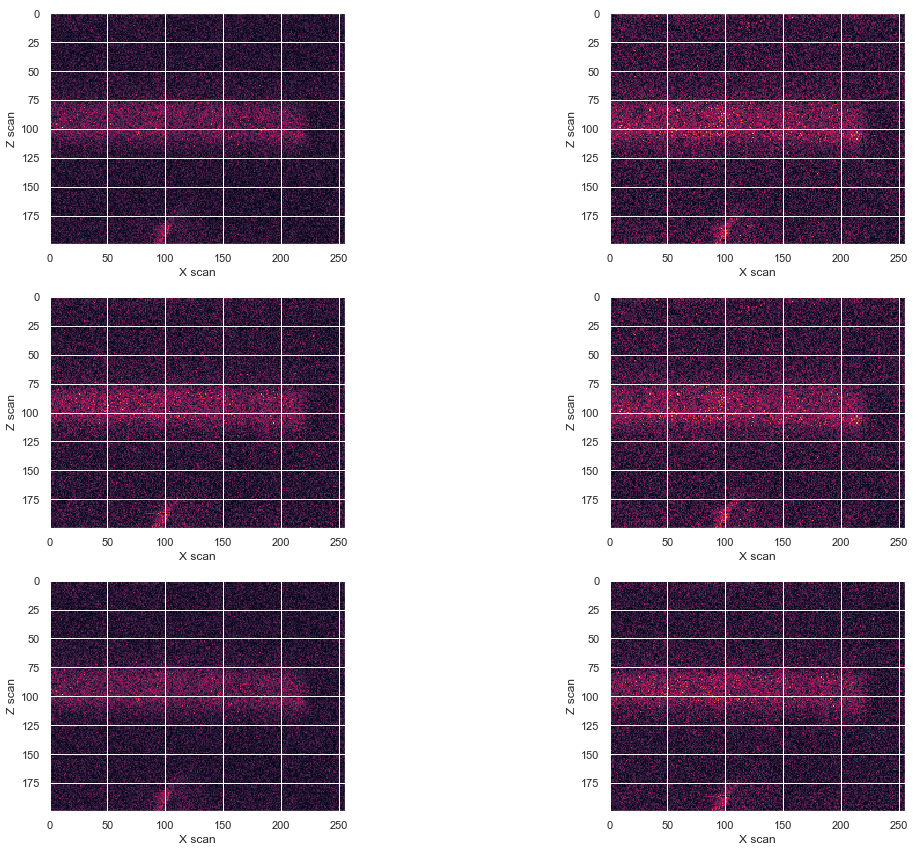

In [167]:
show_toms((tom300mW11, tom300mW12, tom300mW10, tom300mWd12, tom300mWd11,tom300mWd00), nx = 3, ny =2, figsize=(18,12))

In [157]:
tom50mW01    = read_xls_files(TOM['TOMO01_800nm_50mW_S1_256pxTPEF'])
tom100mW01   = read_xls_files(TOM['TOMO01_800nm_100mW_S1_256pxTPEF'])
tom150mW01   = read_xls_files(TOM['TOMO01_800nm_ 150mW_S1_256pxTPEF'])
tom200mW01   = read_xls_files(TOM['TOMO01_800nm_ 200mW_S1_256pxTPEF'])
tom250mW01   = read_xls_files(TOM['TOMO01_800nm_ 250mW_S1_256pxTPEF'])
tom300mW01   = read_xls_files(TOM['TOMO01_800nm_300mW_S1_256px02'])


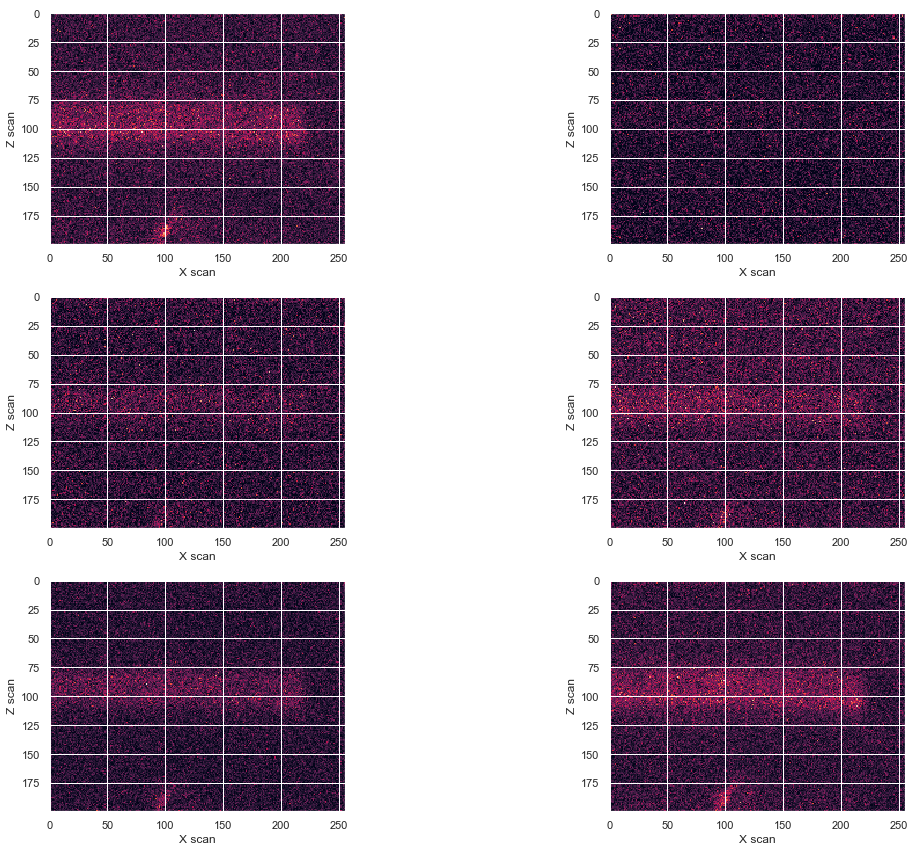

In [158]:
show_toms((tom50mW01, tom100mW01, tom150mW01, tom200mW01, tom250mW01,tom300mW01), nx = 3, ny =2, figsize=(18,12))

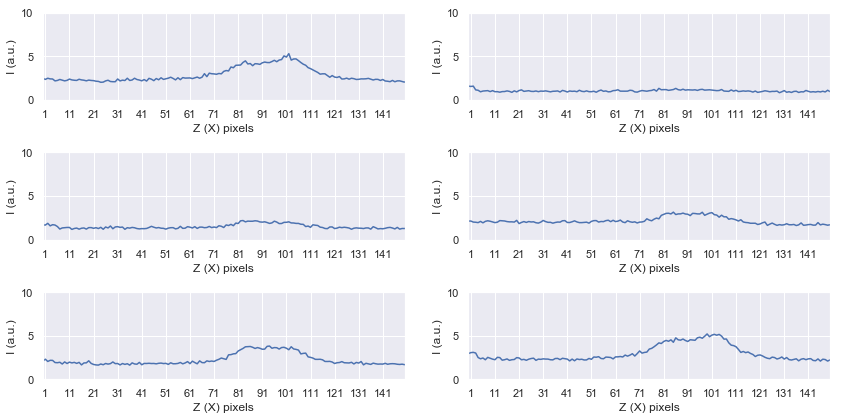

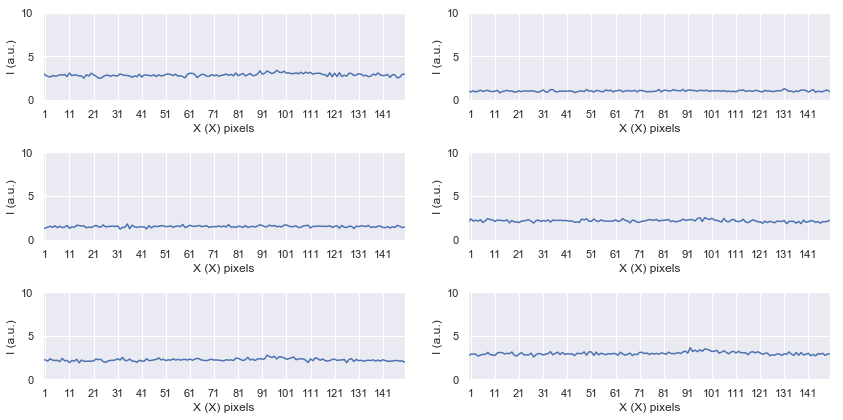

In [159]:
display_profiles((tom50mW01, tom100mW01, tom150mW01, tom200mW01, tom250mW01,tom300mW01), zrange=(0,150), yrange=(0,10), nx = 3, ny =2, figsize=(12,6))

In [160]:
tom100mW01   = read_xls_files(TOM['TOMO01_800nm_100mW_S1_256pxTPEF'])
tom100mW00   = read_xls_files(TOM['TOMO00_800nm_  100mW_S1_256px01'])
tom100mW02   = read_xls_files(TOM['TOMO00_800nm_ 100mW_S1_256px00'])



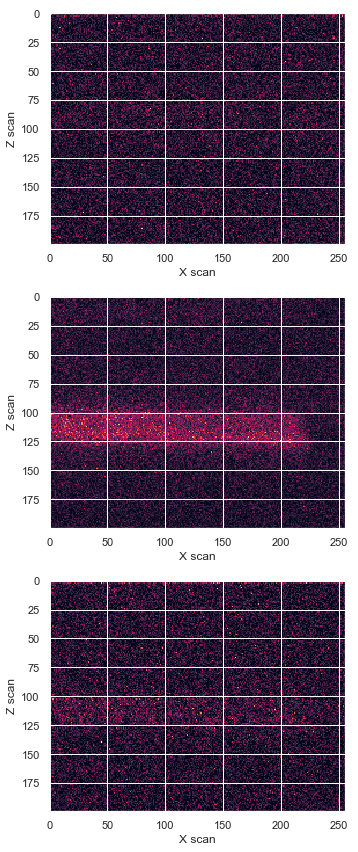

In [161]:
show_toms((tom100mW01, tom100mW00, tom100mW02), nx = 3, ny =1, figsize=(18,12))

In [162]:
tom150mW11   = read_xls_files(TOM['TOMO01_800nm_ 150mW_S1_256pxTPEF'])
tom150mW12   = read_xls_files(TOM['TOMO01_800nm_150mW_S1_256pxTPEF'])

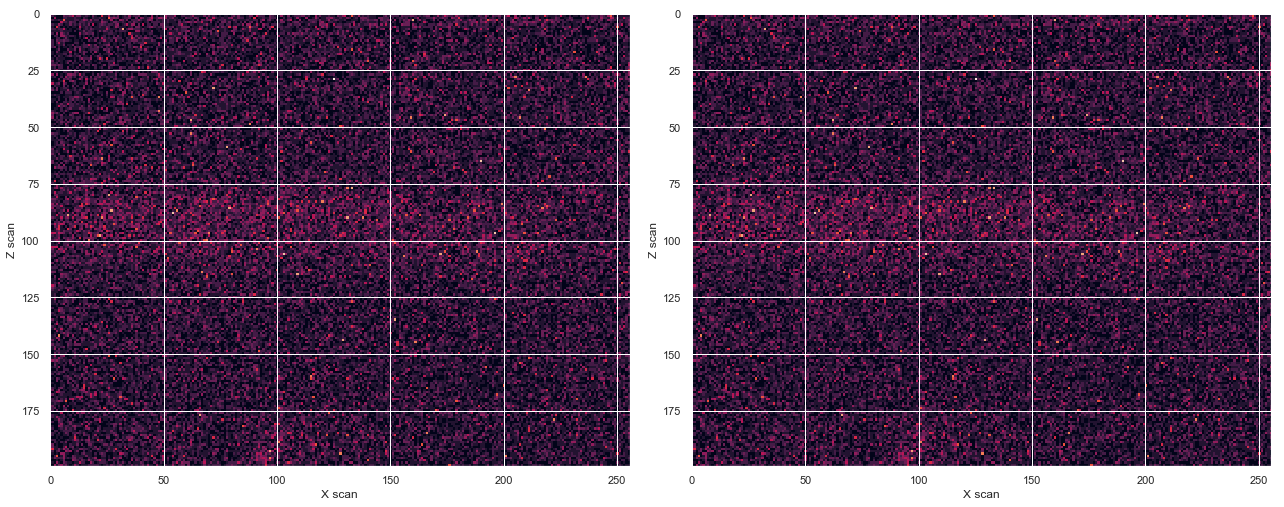

In [163]:
show_toms((tom150mW11, tom150mW11), nx = 1, ny =2, figsize=(18,12))

In [164]:
tom200mW11   = read_xls_files(TOM['TOMO01_800nm_200mW_S1_256pxTPEF'])
tom200mW12   = read_xls_files(TOM['TOMO01_800nm_ 200mW_S1_256pxTPEF'])

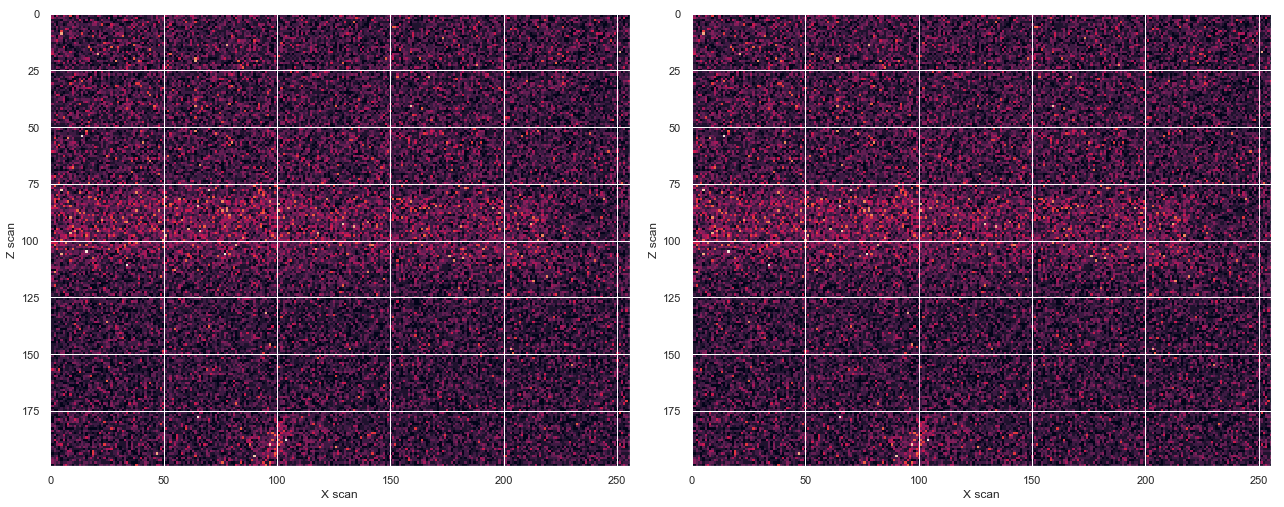

In [165]:
show_toms((tom200mW11, tom200mW12), nx = 1, ny =2, figsize=(18,12))

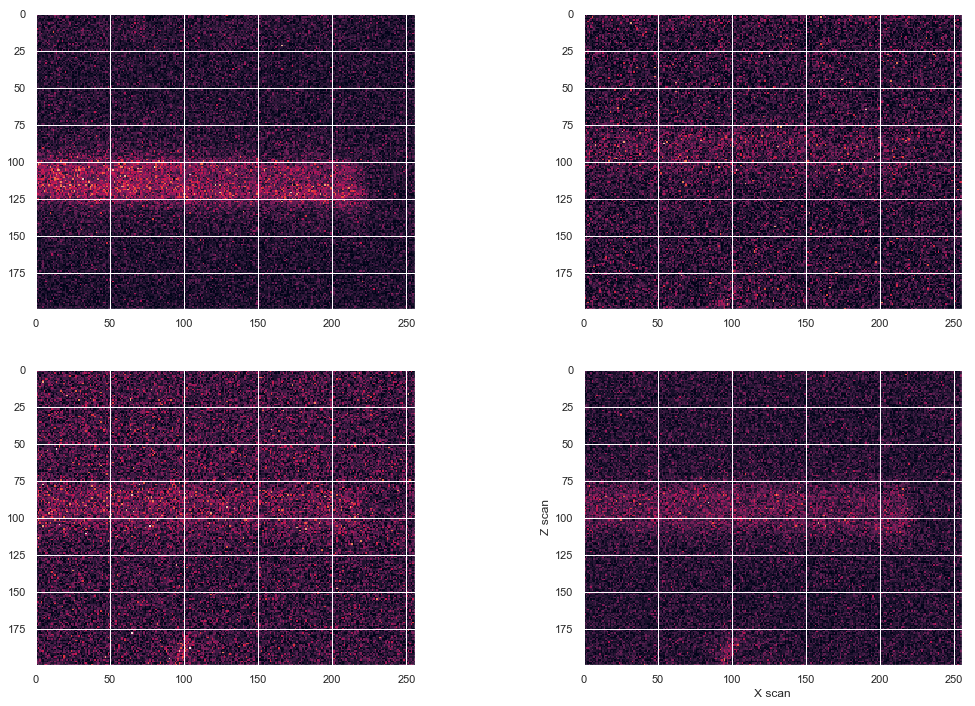

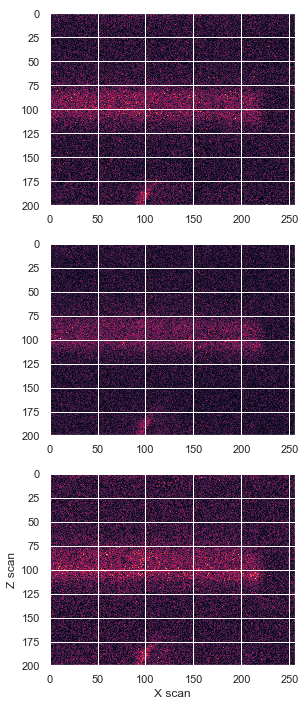

In [22]:
figsize=(18,12)
fig = plt.figure(figsize=figsize)
ax      = fig.add_subplot(2, 2, 1)
plt.imshow(tom04b100.values.T)
ax      = fig.add_subplot(2, 2, 2)
plt.imshow(tom04b150.values.T)
ax      = fig.add_subplot(2, 2, 3)
plt.imshow(tom04b200.values.T)
ax      = fig.add_subplot(2, 2, 4)
plt.imshow(tom04b250.values.T)
plt.xlabel('X scan')
plt.ylabel('Z scan')
plt.show()
fig = plt.figure(figsize=figsize)
ax      = fig.add_subplot(3, 1, 1)
plt.imshow(tom04b300_0.values.T)
ax      = fig.add_subplot(3, 1, 2)
plt.imshow(tom04b300_1.values.T)
ax      = fig.add_subplot(3, 1, 3)
plt.imshow(tom04b300_2.values.T)
plt.xlabel('X scan')
plt.ylabel('Z scan')
plt.show()

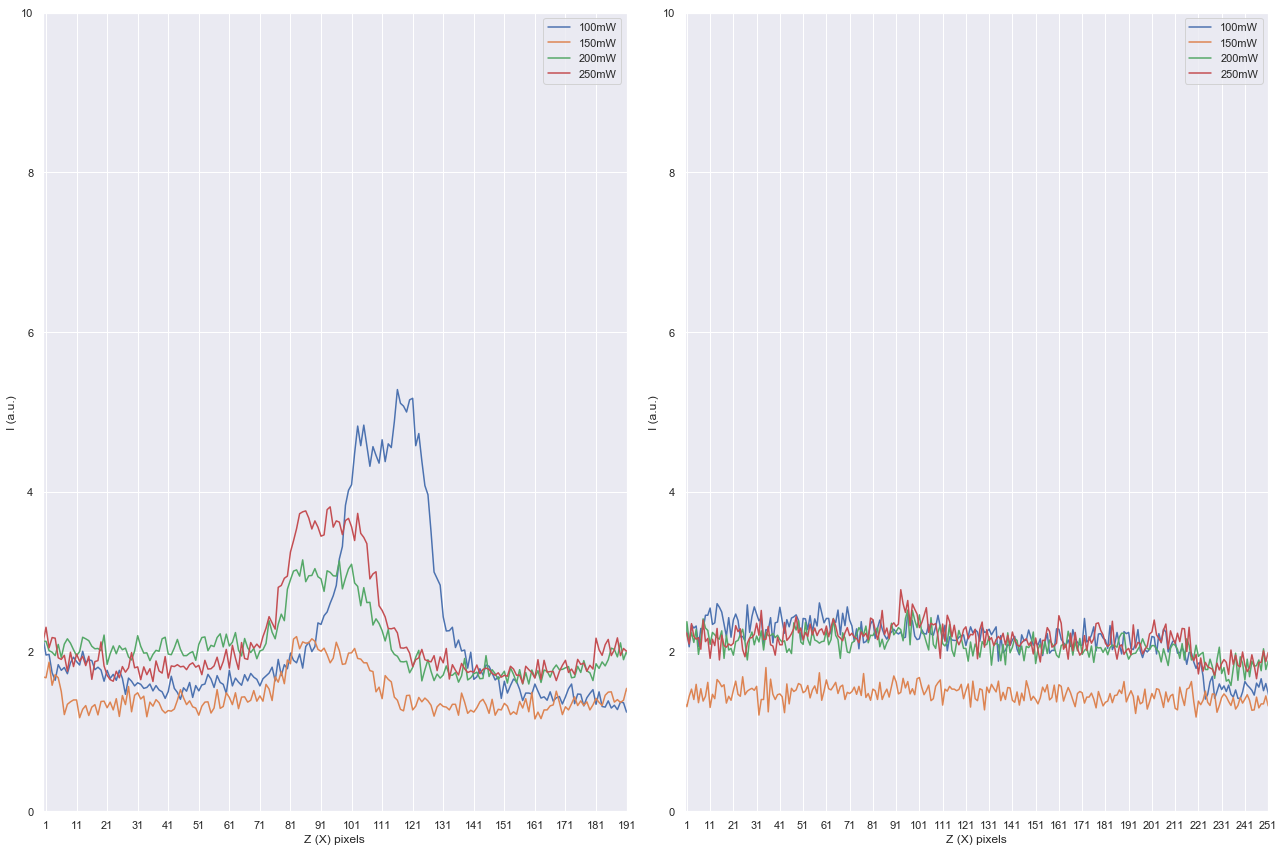

In [23]:
figsize=(18,12)
fig = plt.figure(figsize=figsize)

zrange=(0,10)
yrange=(0,10)
ztrange=(0,10)
ytrange=(0,10)

ax        = fig.add_subplot(1, 2, 1)
Z, Z100   = get_profile(tom04b100)
Z, Z150   = get_profile(tom04b150)
Z, Z200   = get_profile(tom04b200)
Z, Z250   = get_profile(tom04b250)

plt.plot(Z100, label='100mW')
plt.plot(Z150, label='150mW')
plt.plot(Z200, label='200mW')
plt.plot(Z250, label='250mW')
plt.legend()
plt.xlim(*zrange)
plt.ylim(*yrange)
plt.xticks(np.arange(min(Z), max(Z)+1, 10.))
plt.xlabel('Z (X) pixels')
plt.ylabel('I (a.u.)')
 
ax      = fig.add_subplot(1, 2, 2)
Z, Z100   = get_profile(tom04b100.T)
Z, Z150   = get_profile(tom04b150.T)
Z, Z200   = get_profile(tom04b200.T)
Z, Z250   = get_profile(tom04b250.T)

plt.plot(Z100, label='100mW')
plt.plot(Z150, label='150mW')
plt.plot(Z200, label='200mW')
plt.plot(Z250, label='250mW')

plt.xlim(*ztrange)
plt.ylim(*ytrange)
plt.xticks(np.arange(min(Z), max(Z)+1, 10.))
plt.xlabel('Z (X) pixels')
plt.ylabel('I (a.u.)')
 
plt.tight_layout()
plt.legend()
plt.show()

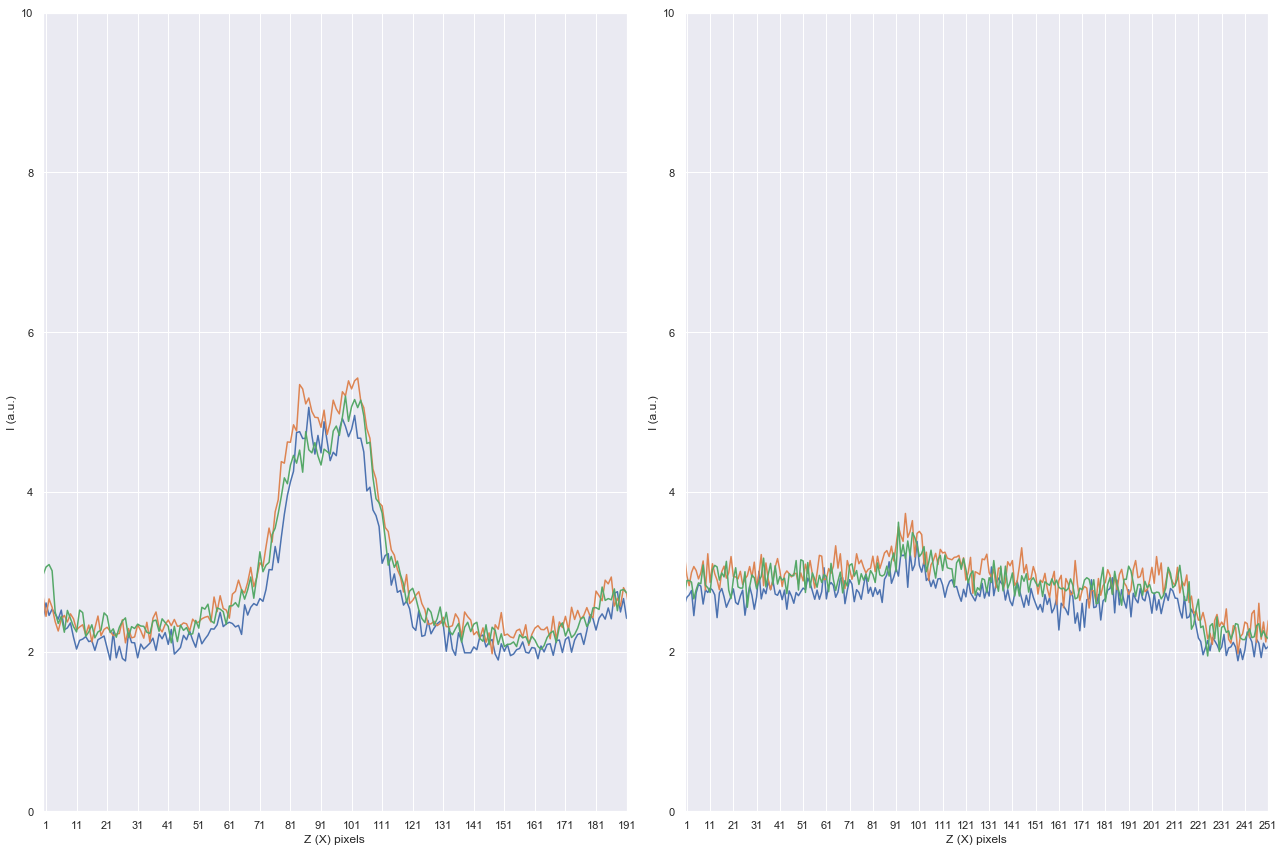

In [24]:
figsize=(18,12)
fig = plt.figure(figsize=figsize)

zrange=(0,10)
yrange=(0,10)
ztrange=(0,10)
ytrange=(0,10)

ax        = fig.add_subplot(1, 2, 1)
Z, Z300_0 = get_profile(tom04b300_0)
Z, Z300_1 = get_profile(tom04b300_1)
Z, Z300_2 = get_profile(tom04b300_2)

plt.plot(Z300_0, label='300mW shot 0')
plt.plot(Z300_1, label='300mW shot 1')
plt.plot(Z300_2, label='300mW shot 2')


plt.xlim(*zrange)
plt.ylim(*yrange)
plt.xticks(np.arange(min(Z), max(Z)+1, 10.))
plt.xlabel('Z (X) pixels')
plt.ylabel('I (a.u.)')
 
ax      = fig.add_subplot(1, 2, 2)

Z, Z300_0 = get_profile(tom04b300_0.T)
Z, Z300_1 = get_profile(tom04b300_1.T)
Z, Z300_2 = get_profile(tom04b300_2.T)

plt.plot(Z300_0, label='300mW shot 0')
plt.plot(Z300_1, label='300mW shot 1')
plt.plot(Z300_2, label='300mW shot 2')
plt.xlim(*ztrange)
plt.ylim(*ytrange)
plt.xticks(np.arange(min(Z), max(Z)+1, 10.))
plt.xlabel('Z (X) pixels')
plt.ylabel('I (a.u.)')
 
plt.tight_layout()
plt.show()

In [60]:
tom04b750b = read_xls_files(TOM['TOMO02_800nm_750mW_before']) 

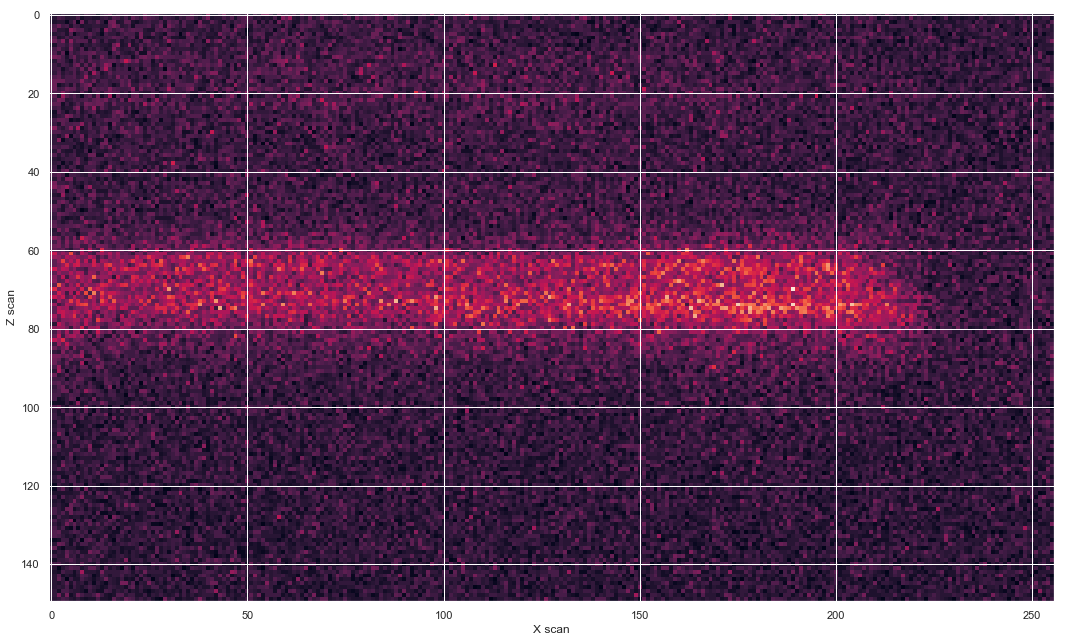

In [61]:
plot_TOM(tom04b750b, figsize=(18,12))

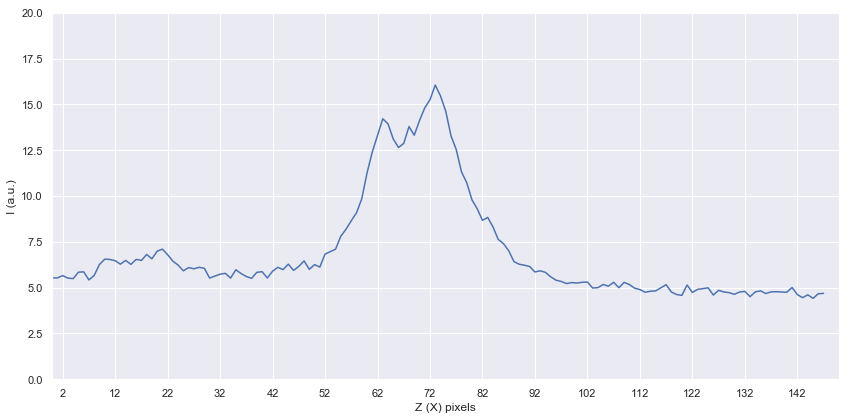

In [64]:
Z, ZV = get_profile(tom04b750b)
display_profile(tom04b750b, zrange=(0,150), yrange=(0,20))

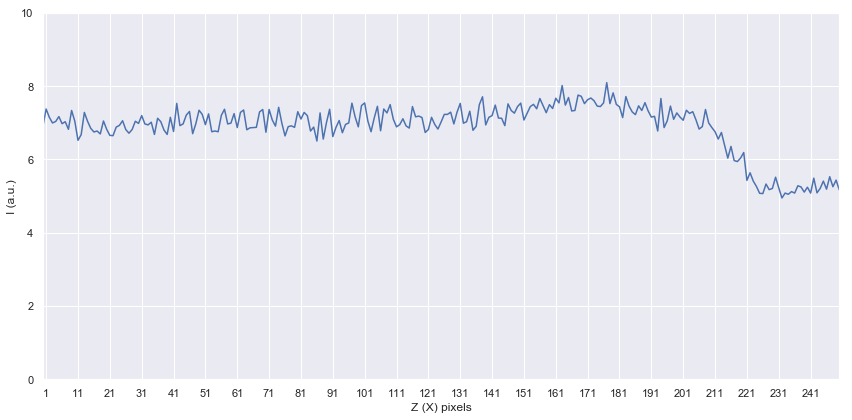

In [66]:
X, XV = get_profile(tom04b750b.T)
display_profile(tom04b750b.T, zrange=(0,250), yrange=(0,10))

In [67]:
tom04b750a = read_xls_files(TOM['TOMO03_800nm_750mW_after'])  

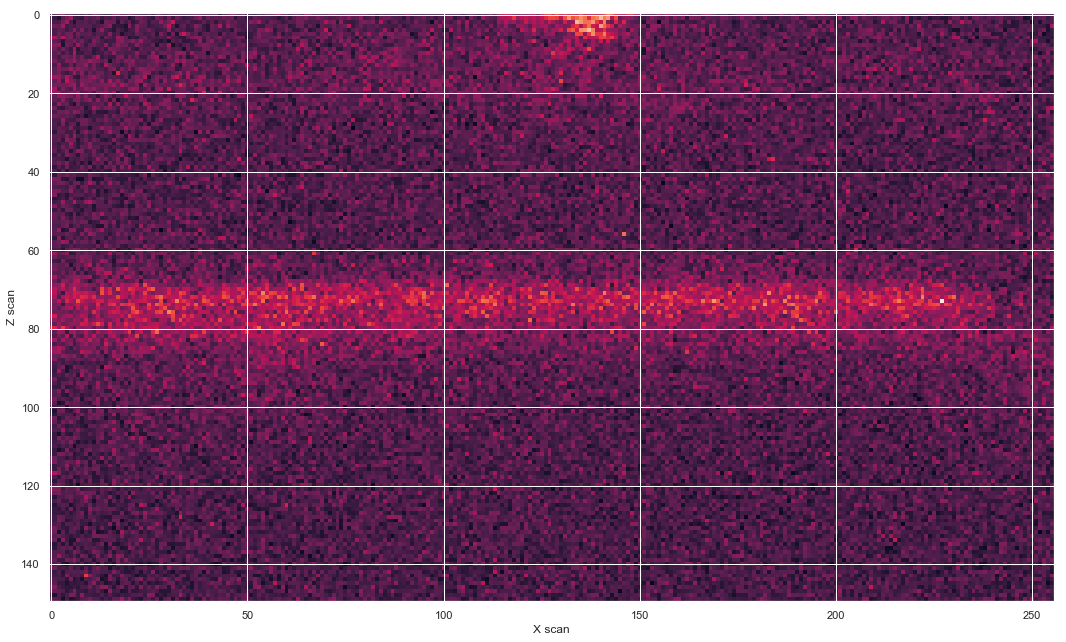

In [68]:
plot_TOM(tom04b750a, figsize=(18,12))

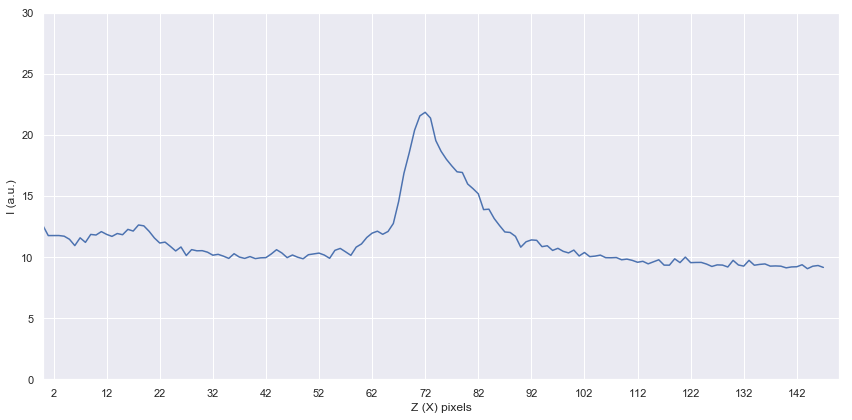

In [70]:
Z, ZV = get_profile(tom04b750a)
display_profile(tom04b750a, zrange=(0,150), yrange=(0,30))

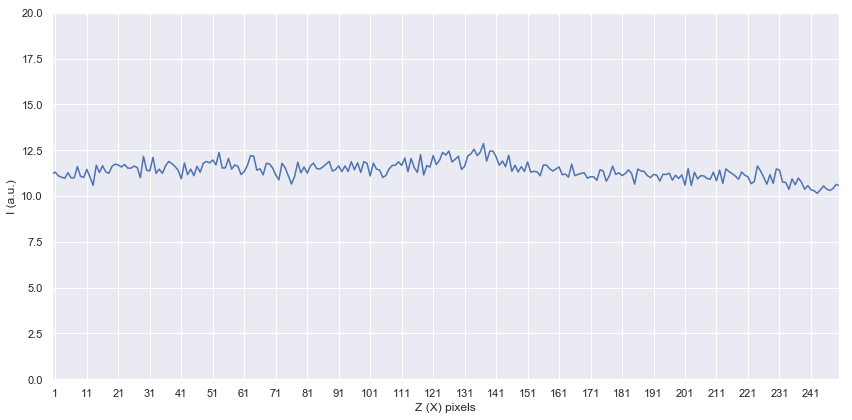

In [72]:
X, XV = get_profile(tom04b750a.T)
display_profile(tom04b750a.T, zrange=(0,250), yrange=(0,20))

### LIVE dirs (scans XY)

In [101]:
LIVE = get_live_dirs(path, sample='sample_4b')

{'LIVE03_800nm_31-60': '/Users/jjgomezcadenas/Projects/Development/data/2Photon/sample_4b/LIVE03_20Hz_800nm_750mW_S1_256px_TPEF_31-60/jpeg', 'LIVE02_800nm_31-60': '/Users/jjgomezcadenas/Projects/Development/data/2Photon/sample_4b/LIVE02_40Hz_800nm_750mW_S1_256px_TPEF_31-60/jpeg', 'LIVE04_800nm_61-90': '/Users/jjgomezcadenas/Projects/Development/data/2Photon/sample_4b/LIVE04_80Hz_800nm_750mW_S1_256px_2mic_TPEF_61-90/jpeg', 'LIVE04_800nm_1-30': '/Users/jjgomezcadenas/Projects/Development/data/2Photon/sample_4b/LIVE04_80Hz_800nm_750mW_S1_256px_2mic_TPEF_1-30/jpeg', 'LIVE04_800nm_91-121': '/Users/jjgomezcadenas/Projects/Development/data/2Photon/sample_4b/LIVE04_80Hz_800nm_750mW_S1_256px_2mic_TPEF_91-121/jpeg', 'LIVE03_800nm_1-30': '/Users/jjgomezcadenas/Projects/Development/data/2Photon/sample_4b/LIVE03_20Hz_800nm_750mW_S1_256px_TPEF_1-30/jpeg', 'LIVE04_800nm_31-60': '/Users/jjgomezcadenas/Projects/Development/data/2Photon/sample_4b/LIVE04_80Hz_800nm_750mW_S1_256px_2mic_TPEF_31-60/jpeg', '

In [26]:
LIVE.keys()

dict_keys(['LIVE03_800nm_31-60', 'LIVE02_800nm_31-60', 'LIVE04_800nm_61-90', 'LIVE04_800nm_1-30', 'LIVE04_800nm_91-121', 'LIVE03_800nm_1-30', 'LIVE04_800nm_31-60', 'LIVE04_800nm_121-150', 'LIVE02_800nm_61-90', 'LIVE02_800nm_1-30'])

### LIVE02 -- 750 mW  --40 Hz

In [27]:
files = glob.glob(LIVE['LIVE02_800nm_1-30']+'/*.jpg')

In [28]:
sfiles = sort_files(files)

In [29]:
L02DF1 = load_LIVE_images(sfiles)

Loading files corresponding to shots ['shot1', 'shot2', 'shot3', 'shot4', 'shot5', 'shot6', 'shot7', 'shot8', 'shot9', 'shot10', 'shot11', 'shot12', 'shot13', 'shot14', 'shot15', 'shot16', 'shot17', 'shot18', 'shot19', 'shot20', 'shot21', 'shot22', 'shot23', 'shot24', 'shot25', 'shot26', 'shot27', 'shot28', 'shot29', 'shot30']


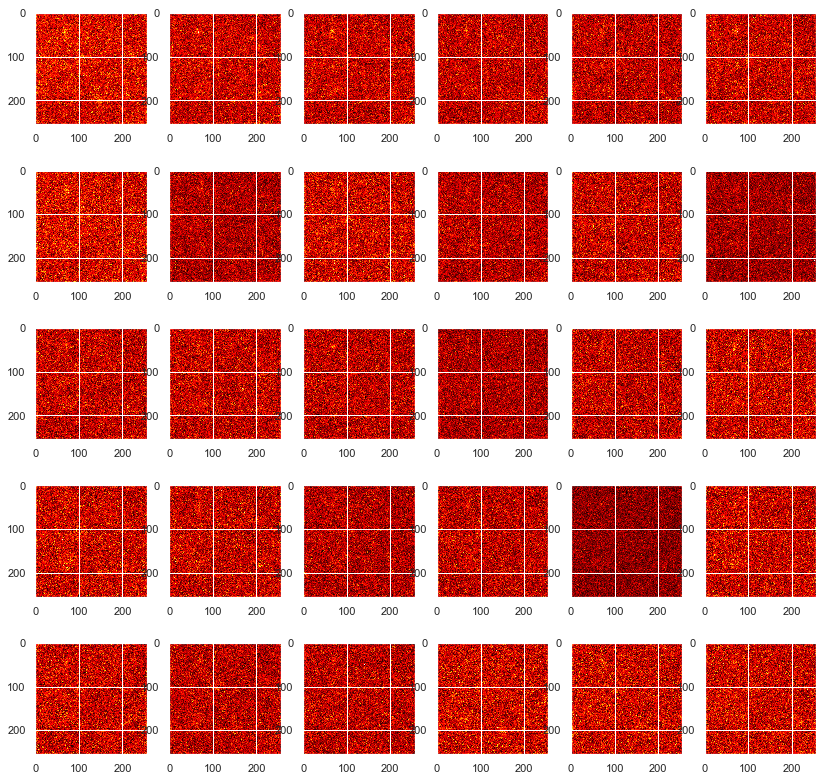

In [30]:
plot_LIVE_images(L02DF1, nx=5, ny=6, figsize=(14,14))

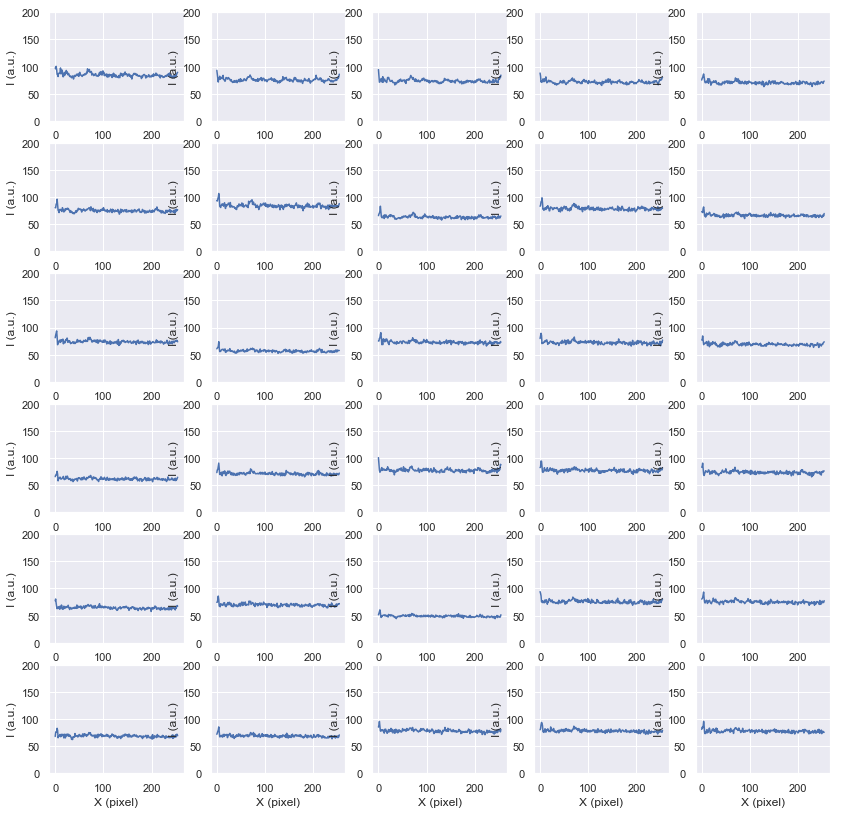

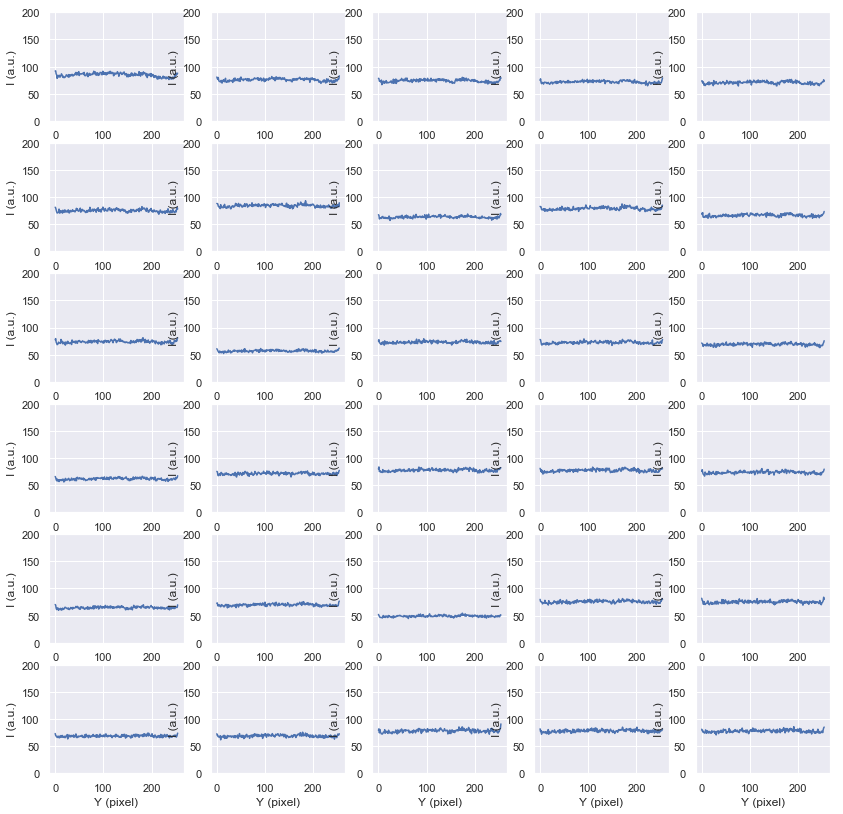

In [31]:
plot_LIVE_avg(L02DF1, xpixel =(0, 255), ypixel = (0,255), imax=200, nx=6, ny=5, figsize=(14,14))

In [32]:
avg_l02df1 = np.mean(avg_intensity(L02DF1))
std_l02df1 = np.std(avg_intensity(L02DF1))
print(f' average intensity per pixel = {avg_l02df1} +- {std_l02df1}')

 average intensity per pixel = 71.9502461751302 +- 7.383132200826196


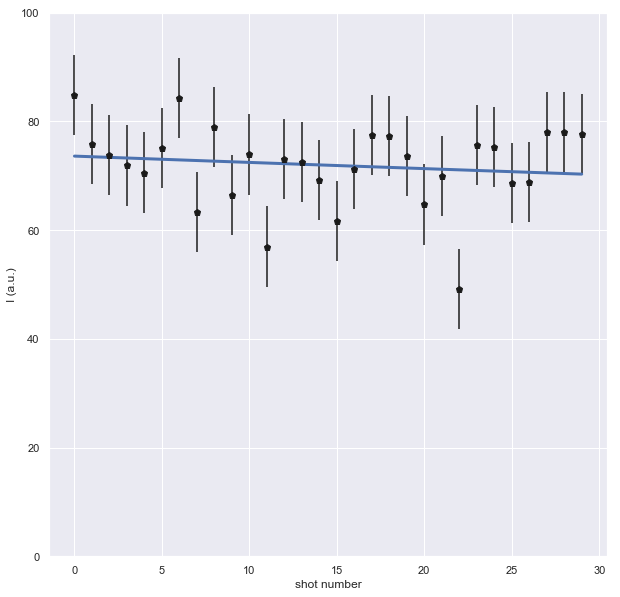

Fit function -->FitFunction(fn=<function fit.<locals>.<lambda> at 0x1a19a9c268>, values=array([  73.61967566, -629.46520869]), errors=array([  2.65864254, 857.16840056]), chi2=1.052886678388677, pvalue=0.3884539132168823, cov=array([[7.06838016e+00, 1.94831544e+03],
       [1.94831544e+03, 7.34737667e+05]]))


In [33]:
I = avg_intensity(L02DF1)
X = np.arange(len(I))
seed = expo_seed(X, I)
f    = fitf.fit(fitf.expo, X, I, seed, sigma= std_l02df1 * np.ones(len(I)))

imax=100
figsize=(10,10)
fig = plt.figure(figsize=figsize)
plt.errorbar(X,I, fmt="kp", yerr= std_l02df1  * np.ones(len(I)), ms=7, ls='none')
plt.plot(X, f.fn(X), lw=3)
plt.ylim(0,imax)
plt.xlabel('shot number')
plt.ylabel('I (a.u.)')
plt.show()
print(f'Fit function -->{f}')

Loading files corresponding to shots ['shot1', 'shot2', 'shot3', 'shot4', 'shot5', 'shot6', 'shot7', 'shot8', 'shot9', 'shot10', 'shot11', 'shot12', 'shot13', 'shot14', 'shot15', 'shot16', 'shot17', 'shot18', 'shot19', 'shot20', 'shot21', 'shot22', 'shot23', 'shot24', 'shot25', 'shot26', 'shot27', 'shot28', 'shot29', 'shot30']


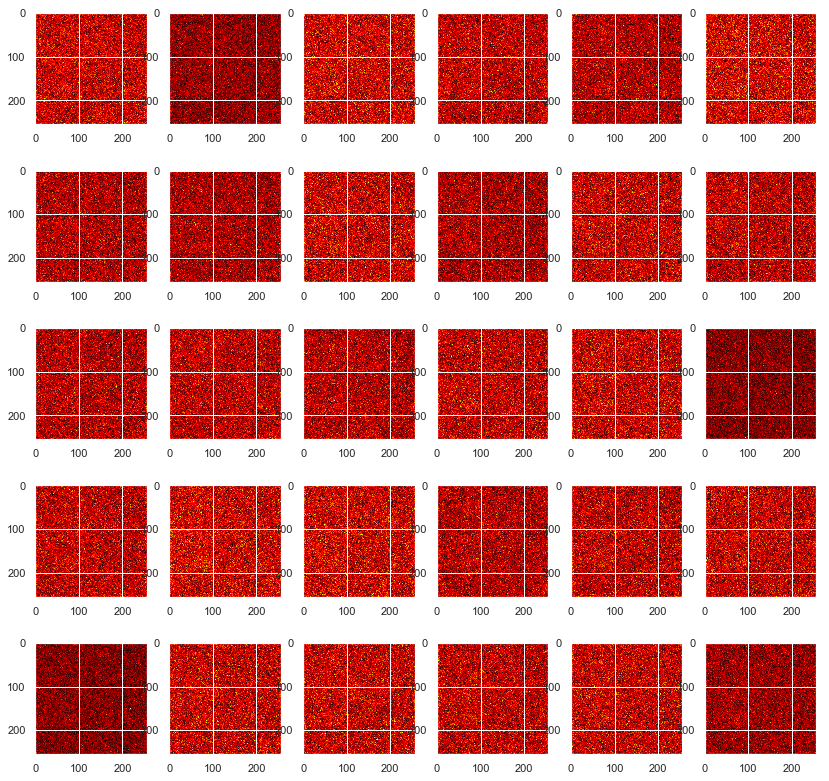

In [34]:
files = glob.glob(LIVE['LIVE02_800nm_31-60']+'/*.jpg')
sfiles = sort_files(files)
L02DF2 = load_LIVE_images(sfiles)
plot_LIVE_images(L02DF2, nx=5, ny=6, figsize=(14,14))

In [35]:
avg_l02df2 = np.mean(avg_intensity(L02DF2))
std_l02df2 = np.std(avg_intensity(L02DF2))
print(f' average intensity per pixel = {avg_l02df2} +- {std_l02df2}')

 average intensity per pixel = 67.85614776611328 +- 8.829283296308146


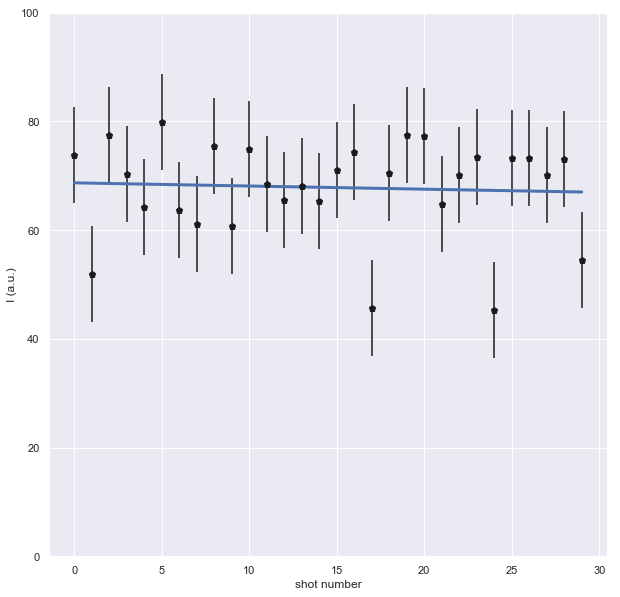

Fit function -->FitFunction(fn=<function fit.<locals>.<lambda> at 0x1a1ca49ae8>, values=array([   68.70161216, -1168.4189871 ]), errors=array([3.16354621e+00, 3.74721204e+03]), chi2=1.0679329396510764, pvalue=0.36791191900035336, cov=array([[1.00080246e+01, 1.01552029e+04],
       [1.01552029e+04, 1.40415980e+07]]))


In [36]:
I = avg_intensity(L02DF2)
X = np.arange(len(I))
seed = expo_seed(X, I)
f    = fitf.fit(fitf.expo, X, I, seed, sigma= std_l02df2 * np.ones(len(I)))

imax=100
figsize=(10,10)
fig = plt.figure(figsize=figsize)
plt.errorbar(X,I, fmt="kp", yerr= std_l02df2  * np.ones(len(I)), ms=7, ls='none')
plt.plot(X, f.fn(X), lw=3)
plt.ylim(0,imax)
plt.xlabel('shot number')
plt.ylabel('I (a.u.)')
plt.show()
print(f'Fit function -->{f}')

Loading files corresponding to shots ['shot1', 'shot2', 'shot3', 'shot4', 'shot5', 'shot6', 'shot7', 'shot8', 'shot9', 'shot10', 'shot11', 'shot12', 'shot13', 'shot14', 'shot15', 'shot16', 'shot17', 'shot18', 'shot19', 'shot20', 'shot21', 'shot22', 'shot23', 'shot24', 'shot25', 'shot26', 'shot27', 'shot28', 'shot29', 'shot30']


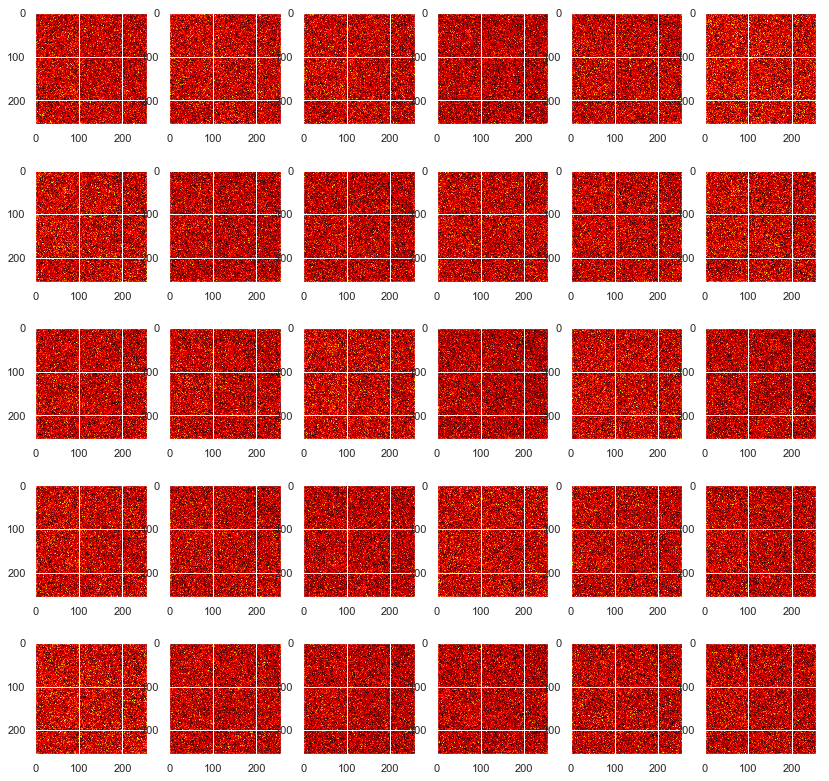

In [37]:
files = glob.glob(LIVE['LIVE02_800nm_61-90']+'/*.jpg')
sfiles = sort_files(files)
L02DF3 = load_LIVE_images(sfiles)
plot_LIVE_images(L02DF3, nx=5, ny=6, figsize=(14,14))

In [38]:
avg_l02df3 = np.mean(avg_intensity(L02DF3))
std_l02df3 = np.std(avg_intensity(L02DF3))
print(f' average intensity per pixel = {avg_l02df3} +- {std_l02df3}')

 average intensity per pixel = 71.67516784667968 +- 3.430874082380756


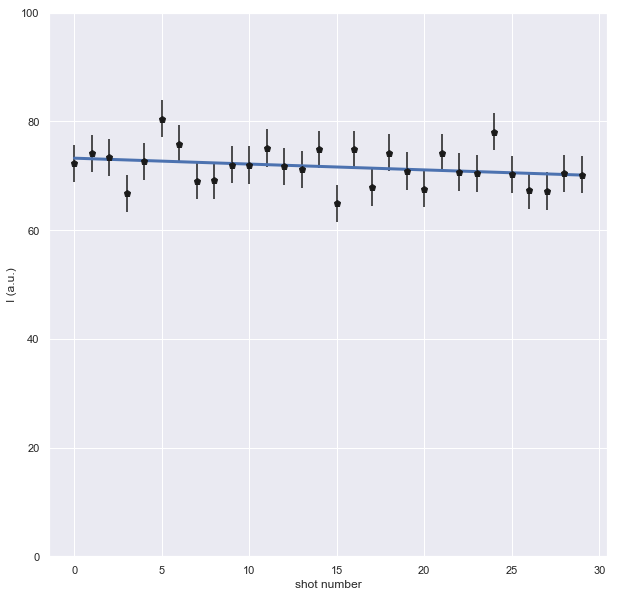

Fit function -->FitFunction(fn=<function fit.<locals>.<lambda> at 0x107e45d90>, values=array([  73.23929296, -669.09045802]), errors=array([  1.23465244, 452.07065585]), chi2=0.9930169850502834, pvalue=0.47484445634446226, cov=array([[1.52436664e+00, 4.77306252e+02],
       [4.77306252e+02, 2.04367878e+05]]))


In [39]:
I = avg_intensity(L02DF3)
X = np.arange(len(I))
seed = expo_seed(X, I)
f    = fitf.fit(fitf.expo, X, I, seed, sigma= std_l02df3 * np.ones(len(I)))

imax=100
figsize=(10,10)
fig = plt.figure(figsize=figsize)
plt.errorbar(X,I, fmt="kp", yerr= std_l02df3  * np.ones(len(I)), ms=7, ls='none')
plt.plot(X, f.fn(X), lw=3)
plt.ylim(0,imax)
plt.xlabel('shot number')
plt.ylabel('I (a.u.)')
plt.show()
print(f'Fit function -->{f}')

In [40]:
L02DF = L02DF1 + L02DF2 + L02DF3 

In [41]:
avg_l02df = np.mean(avg_intensity(L02DF))
std_l02df = np.std(avg_intensity(L02DF))
print(f' average intensity per pixel = {avg_l02df} +- {std_l02df}')

 average intensity per pixel = 70.49385392930773 +- 7.181268605172701


In [42]:
I = avg_intensity(L02DF)
X = np.arange(len(I))
seed = expo_seed(X, I)
f    = fitf.fit(fitf.expo, X, I, seed, sigma=std_l02df * np.ones(len(I)))

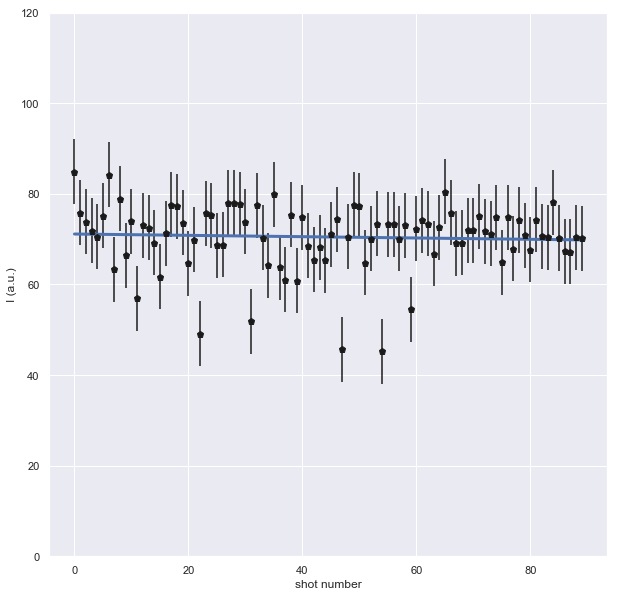

Fit function -->FitFunction(fn=<function fit.<locals>.<lambda> at 0x1a1b145840>, values=array([   71.14306567, -4846.46285959]), errors=array([1.50819271e+00, 9.70756178e+03]), chi2=1.019945929447114, pvalue=0.42793535523147497, cov=array([[2.27464527e+00, 1.26237554e+04],
       [1.26237554e+04, 9.42367558e+07]]))


In [43]:
imax=120
figsize=(10,10)
fig = plt.figure(figsize=figsize)
plt.errorbar(X,I, fmt="kp", yerr=std_l02df * np.ones(len(I)), ms=7, ls='none')
plt.plot(X, f.fn(X), lw=3)
plt.ylim(0,imax)
plt.xlabel('shot number')
plt.ylabel('I (a.u.)')
plt.show()
print(f'Fit function -->{f}')

## 750 mW 20 Hz

Loading files corresponding to shots ['shot1', 'shot2', 'shot3', 'shot4', 'shot5', 'shot6', 'shot7', 'shot8', 'shot9', 'shot10', 'shot11', 'shot12', 'shot13', 'shot14', 'shot15', 'shot16', 'shot17', 'shot18', 'shot19', 'shot20', 'shot21', 'shot22', 'shot23', 'shot24', 'shot25', 'shot26', 'shot27', 'shot28', 'shot29', 'shot30']


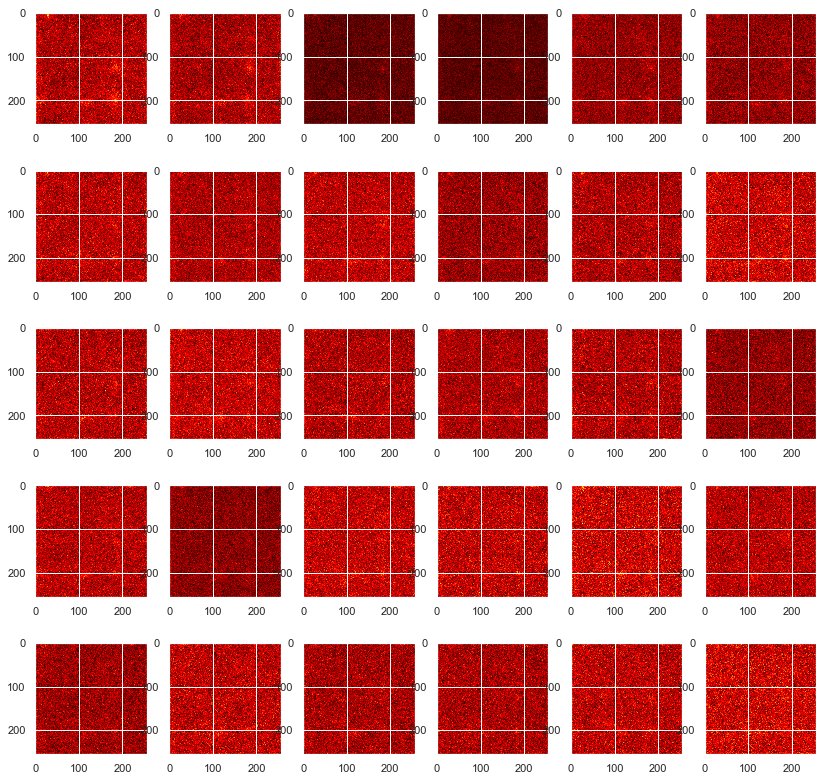

In [90]:
files = glob.glob(LIVE['LIVE03_800nm_1-30']+'/*.jpg')
sfiles = sort_files(files)
L03DF1 = load_LIVE_images(sfiles)
plot_LIVE_images(L03DF1, nx=5, ny=6, figsize=(14,14))

In [91]:
avg_l03df1 = np.mean(avg_intensity(L03DF1))
std_l03df1 = np.std(avg_intensity(L03DF1))
print(f' average intensity per pixel = {avg_l03df1} +- {std_l03df1}')

 average intensity per pixel = 61.13432057698568 +- 10.37944231212557


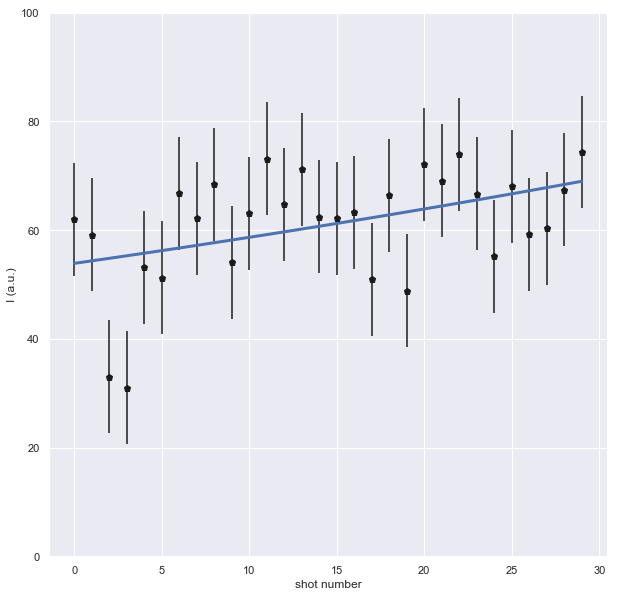

Fit function -->FitFunction(fn=<function fit.<locals>.<lambda> at 0x1a1b145d08>, values=array([ 53.89212379, 117.44561509]), errors=array([ 3.47974434, 49.59803519]), chi2=0.8633051634851395, pvalue=0.6723960370002621, cov=array([[  12.10862064,  151.52484271],
       [ 151.52484271, 2459.96509471]]))


In [92]:
I = avg_intensity(L03DF1)
X = np.arange(len(I))
seed = expo_seed(X, I)
f    = fitf.fit(fitf.expo, X, I, seed, sigma= std_l03df1 * np.ones(len(I)))

imax=100
figsize=(10,10)
fig = plt.figure(figsize=figsize)
plt.errorbar(X,I, fmt="kp", yerr= std_l03df1  * np.ones(len(I)), ms=7, ls='none')
plt.plot(X, f.fn(X), lw=3)
plt.ylim(0,imax)
plt.xlabel('shot number')
plt.ylabel('I (a.u.)')
plt.show()
print(f'Fit function -->{f}')

Loading files corresponding to shots ['shot1', 'shot2', 'shot3', 'shot4', 'shot5', 'shot6', 'shot7', 'shot8', 'shot9', 'shot10', 'shot11', 'shot12', 'shot13', 'shot14', 'shot15', 'shot16', 'shot17', 'shot18', 'shot19', 'shot20', 'shot21', 'shot22', 'shot23', 'shot24', 'shot25', 'shot26', 'shot27', 'shot28', 'shot29', 'shot30']


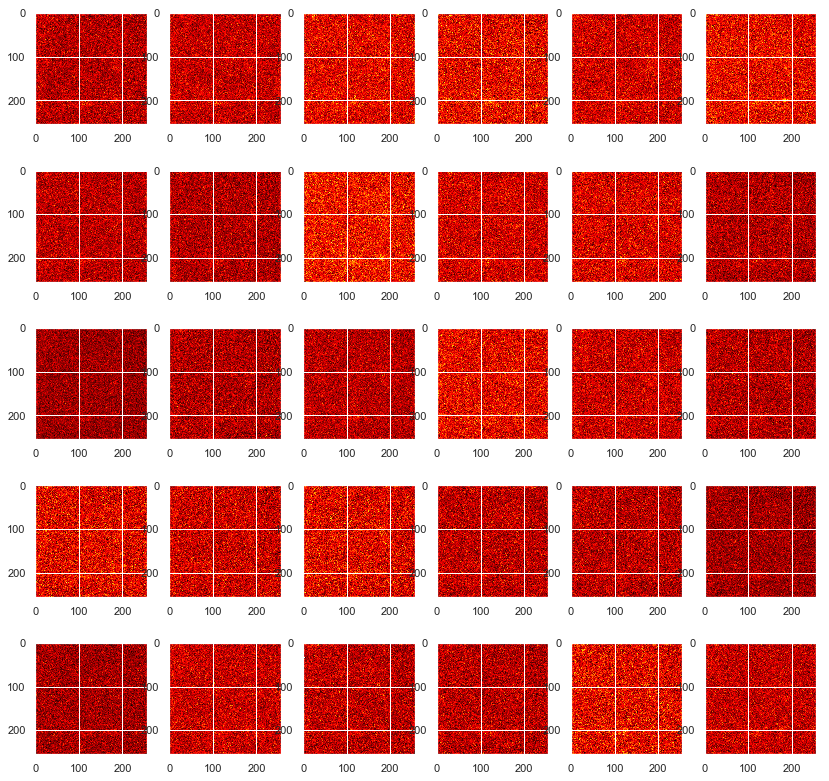

In [93]:
files = glob.glob(LIVE['LIVE03_800nm_31-60']+'/*.jpg')
sfiles = sort_files(files)
L03DF2 = load_LIVE_images(sfiles)
plot_LIVE_images(L03DF2, nx=5, ny=6, figsize=(14,14))

In [94]:
L03DF = L03DF1 + L03DF2 

In [95]:
avg_l03df = np.mean(avg_intensity(L03DF))
std_l03df = np.std(avg_intensity(L03DF))
print(f' average intensity per pixel = {avg_l03df} +- {std_l03df}')

 average intensity per pixel = 66.8869992574056 +- 11.90410320421636


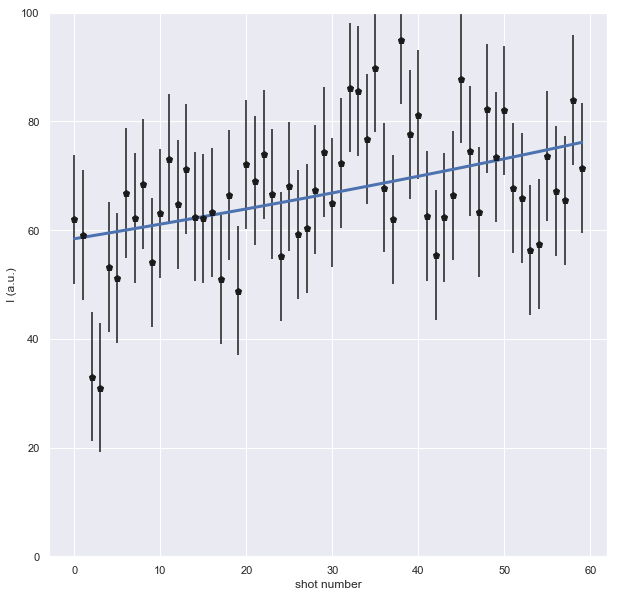

Fit function -->FitFunction(fn=<function fit.<locals>.<lambda> at 0x1a1cb77400>, values=array([ 58.42054091, 222.68746235]), errors=array([ 2.83942725, 66.05747036]), chi2=0.8268285692895994, pvalue=0.8237340625874857, cov=array([[   8.0623471 ,  165.43417073],
       [ 165.43417073, 4363.58939027]]))


In [96]:
I = avg_intensity(L03DF)
X = np.arange(len(I))
seed = expo_seed(X, I)
sigma = std_l03df
f    = fitf.fit(fitf.expo, X, I, seed, sigma= sigma * np.ones(len(I)))

imax=100
figsize=(10,10)
fig = plt.figure(figsize=figsize)
plt.errorbar(X,I, fmt="kp", yerr= sigma  * np.ones(len(I)), ms=7, ls='none')
plt.plot(X, f.fn(X), lw=3)
plt.ylim(0,imax)
plt.xlabel('shot number')
plt.ylabel('I (a.u.)')
plt.show()
print(f'Fit function -->{f}')

## LIVE04  --750 mW -- 80 MHz

In [99]:
live04 = {'LIVE04_800nm_1-30','LIVE04_800nm_31-60','LIVE04_800nm_61-90','LIVE04_800nm_91-121','LIVE04_800nm_121-150'}

In [102]:
L04 = []
for live in live04:
    files = glob.glob(LIVE[live]+'/*.jpg')
    sfiles = sort_files(files)
    L04.append(load_LIVE_images(sfiles))

Loading files corresponding to shots ['shot1', 'shot2', 'shot3', 'shot4', 'shot5', 'shot6', 'shot7', 'shot8', 'shot9', 'shot10', 'shot11', 'shot12', 'shot13', 'shot14', 'shot15', 'shot16', 'shot17', 'shot18', 'shot19', 'shot20', 'shot21', 'shot22', 'shot23', 'shot24', 'shot25', 'shot26', 'shot27', 'shot28', 'shot29', 'shot30']
Loading files corresponding to shots ['shot1', 'shot2', 'shot3', 'shot4', 'shot5', 'shot6', 'shot7', 'shot8', 'shot9', 'shot10', 'shot11', 'shot12', 'shot13', 'shot14', 'shot15', 'shot16', 'shot17', 'shot18', 'shot19', 'shot20', 'shot21', 'shot22', 'shot23', 'shot24', 'shot25', 'shot26', 'shot27', 'shot28', 'shot29', 'shot30']
Loading files corresponding to shots ['shot1', 'shot2', 'shot3', 'shot4', 'shot5', 'shot6', 'shot7', 'shot8', 'shot9', 'shot10', 'shot11', 'shot12', 'shot13', 'shot14', 'shot15', 'shot16', 'shot17', 'shot18', 'shot19', 'shot20', 'shot21', 'shot22', 'shot23', 'shot24', 'shot25', 'shot26', 'shot27', 'shot28', 'shot29', 'shot30']
Loading files

In [104]:
L04DF = reduce((lambda x, y: x + y), L04)

In [105]:
avg_l04df = np.mean(avg_intensity(L04DF))
std_l04df = np.std(avg_intensity(L04DF))
print(f' average intensity per pixel = {avg_l04df} +- {std_l04df}')

 average intensity per pixel = 48.266754659016925 +- 7.881528008996062


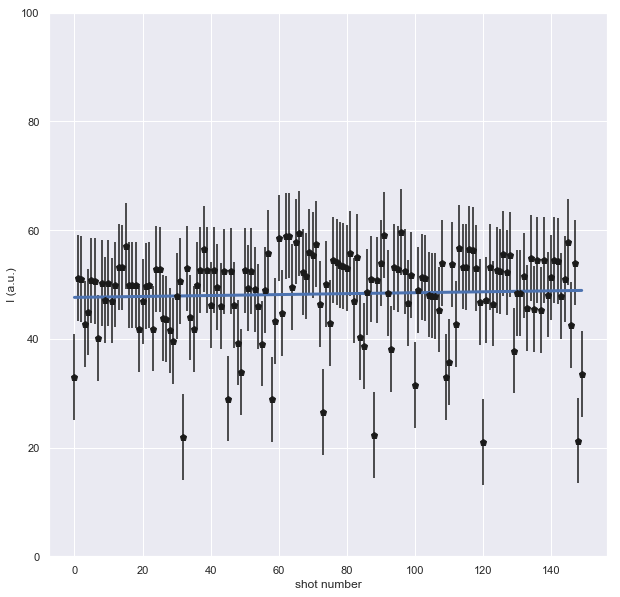

Fit function -->FitFunction(fn=<function fit.<locals>.<lambda> at 0x1a1aa0af28>, values=array([  47.62949402, 5617.78542265]), errors=array([1.27222634e+00, 9.70014611e+03]), chi2=1.011230753088242, pvalue=0.44631505918691927, cov=array([[1.61855985e+00, 1.06936520e+04],
       [1.06936520e+04, 9.40928345e+07]]))


In [106]:
I = avg_intensity(L04DF)
X = np.arange(len(I))
seed = expo_seed(X, I)
sigma = std_l04df

f    = fitf.fit(fitf.expo, X, I, seed, sigma= sigma * np.ones(len(I)))

imax=100
figsize=(10,10)
fig = plt.figure(figsize=figsize)
plt.errorbar(X,I, fmt="kp", yerr= sigma  * np.ones(len(I)), ms=7, ls='none')
plt.plot(X, f.fn(X), lw=3)
plt.ylim(0,imax)
plt.xlabel('shot number')
plt.ylabel('I (a.u.)')
plt.show()
print(f'Fit function -->{f}')

## Summary:
- We see no proportionality between 20/40/80 Hz. Signal should be proportional to the time spent in every pixel. Instead we see the values 60/70/50 which suggests that we are close to background. 
- This can bee seen analyzing the expected intensity

## Translate Intensity to photons


        Pulsed Laser:
        wavelength                =8.0e+02 nm
        photon energy             =1.6e+00 eV
        power                     =4.5e+02 mW
        repetition rate           =7.6e+01 kHz
        pulse width               =4.0e+02 fs
        energy per pulse          =3.4e+04 fJ
        energy per second         =4.5e+02 mJ
        photons per second        =1.8e+18 ph/second
        

        name                 = JMB
        NA                   =   0.5
        M                    =  20.0
        eff dichroic         =  0.70
        eff filter           =  1.00
        eff PMT              =  0.10
        Optical transmission =  0.96
        Filter  transmission =  0.70
        Total transmission   =  0.07
        

        w0                   =   0.5 micron
        zr                   =   1.0 micron
        DOF                  =   2.0 micron
        
 Diffraction limit transverse size of beam = 0.9760000000000002
pixel size = 3.5e-01 mum
time per pixel =29.2

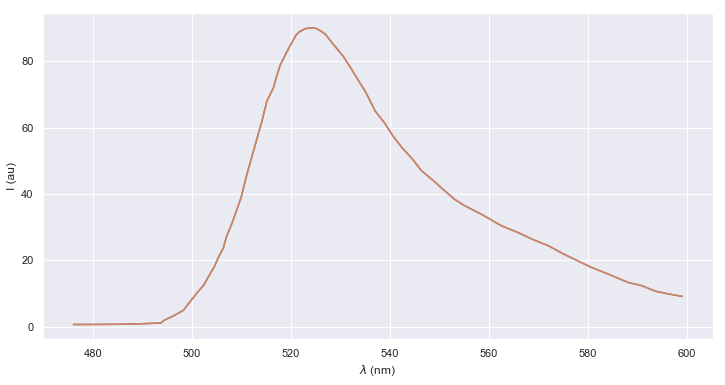

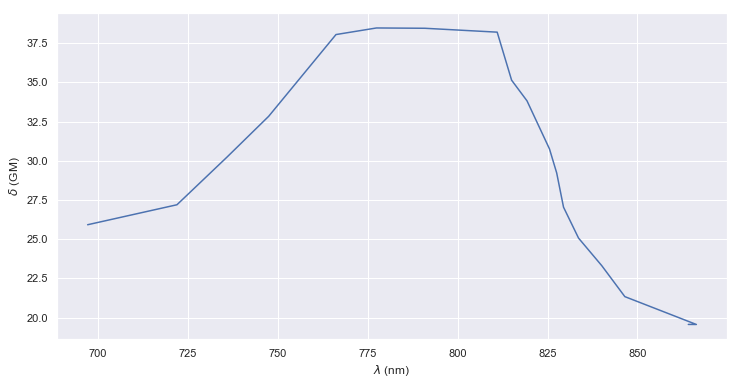

In [176]:
s2 = Setup(            setup_name             = 'Espinardo',
                        molecule_name          = 'FLUO3',
                        sample_name            = '4ba',
                        sample_concentration   = 10/6 * nanomole/liter,
                        laser_lambda           = 800 * nm,
                        laser_power            = 750 * mW,
                        laser_eff              = 0.6,
                        laser_lambda_eff       = 1,
                        laser_f                = 76  * megahertz,
                        laser_tau              = 400 * femtosecond,
                        mc_name                = 'JMB',
                        mc_NA                  = 0.5,
                        mc_M                   = 20,
                        mc_eff_dic             = 0.7,
                        mc_eff_filt            = 1.0,
                        mc_eff_PMT             = 0.1,
                        n_pixels               = 256,
                        scan_length            = 90 * mum,
                        v_per_line             = 40)

In [178]:
I40Hz = 71.4
F = s2.fluorescence()
nf = s2.photons_per_pixel()
pnm = s2.photons_per_pixel_per_molecule()
nd = s2.detected_photons_per_pixel()
IN = I40Hz/ nd 
print(f' F = {F/us:5.1e}  photons/second')
print(f' nf = {nf:5.1e} photons/pixel (about 30 mus)')
print(f' nm = {pnm:5.1e} photons/pixel/molecule (about 30 mus)')
print(f' nd = {nd:5.1e} detected photons/pixel (about 30 mus)')
print(f' number of photons per count = {IN:5.1e} ')

 F = 2.0e+07  photons/second
 nf = 5.8e+02 photons/pixel (about 30 mus)
 nm = 3.5e+02 photons/pixel/molecule (about 30 mus)
 nd = 3.9e+01 detected photons/pixel (about 30 mus)
 number of photons per count = 1.8e+00 
